In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
import sys
sys.path.append("..")
from spatial_ultis import *

In [3]:
#此为探究dii变化的基点，dii从0.06到0.07
rescale = 160
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 5/rescale, 9/rescale, -9/rescale, -14/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 0,0,0,0
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.07

In [6]:
#此为探究J的基点，j_EE从4.6到5.4，j_II从-12到-16
rescale = 207.5
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 5/rescale, 9/rescale, -9/rescale, -14/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 0,0,0,0
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.08

In [8]:
#此为探究J_EI,J_IE的基点,J_IE,J_EI一起从0变化到10
rescale = 400
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 4/rescale, 8/rescale, -8/rescale, 0/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = 8/rescale, 8/rescale, 16/rescale, 0/rescale
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.05   

In [10]:
#此为探究sigma的基点,从0变化到1.6
sigma_rescale = 1.6
rescale = 207.5
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 5/rescale, 9/rescale, -9/rescale, -14/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([5/rescale, 9/rescale, -9/rescale, -14/rescale]) * sigma_rescale)
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.08

In [26]:
#alpha从0.1到0.9
sigma_rescale = 0
rescale = 207.5
alpha = 0.15
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
J_EE, J_IE, J_EI, J_II = 5*200/(rescale*conn_NEE), 9*50/(rescale*conn_NIE), -9*200/(rescale*conn_NEI), -14*50/(rescale*conn_NII)
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([5*np.sqrt(200)/(rescale*np.sqrt(conn_NEE)), 9*np.sqrt(50)/(rescale*np.sqrt(conn_NIE)), 9*np.sqrt(200)/(rescale*np.sqrt(conn_NEI)), 14*np.sqrt(50)/(rescale*np.sqrt(conn_NII))]) * sigma_rescale)
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.08

In [17]:
#g_bar
sigma_rescale = 1.4
rescale = 207.5
N_E, N_I = 22500, 5625
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 5/rescale, 9/rescale, -9/rescale, -14/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([5/rescale, 9/rescale, -9/rescale, -14/rescale]) * sigma_rescale)
d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.08

sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([5/rescale, 9/rescale, -9/rescale, -14/rescale]) * sigma_rescale)


In [154]:
#small
rescale = 1600
sigma_rescale = 5.5
sigma_rescale_list = list(np.array([0.2,0.6,1,1.4,1.8]) * sigma_rescale)
N_E, N_I = 4900, 1225
conn_NEE, conn_NIE, conn_NEI, conn_NII = 200, 50, 200, 50
J_EE, J_IE, J_EI, J_II = 4/rescale, 4/rescale, -8/rescale, 0/rescale
sigma_EE, sigma_IE, sigma_EI, sigma_II = tuple(np.array([8/rescale, 8/rescale, 16/rescale, 0/rescale]) * sigma_rescale)
d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.1 

In [4]:
2*np.pi * N_E * d_EE **2

353.42917352885183

(-1.1088291784374387,
 1.1106118568517107,
 -2.1326321857286654,
 2.1326321857286654)

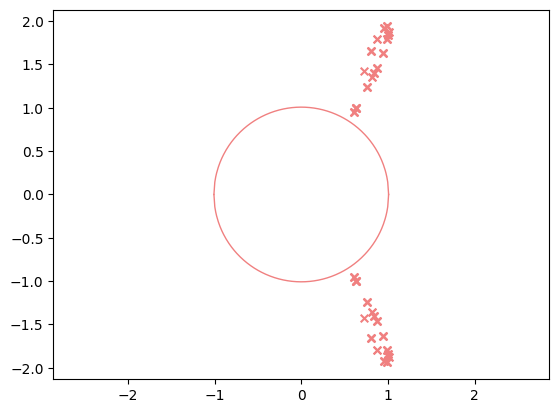

In [27]:
w_EE = conn_NEE * J_EE * np.sqrt(N_E/N_E)
w_IE = conn_NIE * J_IE * np.sqrt(N_E/N_I)
w_EI = conn_NEI * J_EI * np.sqrt(N_I/N_E)
w_II = conn_NII * J_II * np.sqrt(N_I/N_I)
lambda_list_pred = []
label_list_pred = []
for n_x in range(int(np.sqrt(N_E+N_I)//2)):
    for n_y in range(int(np.sqrt(N_E+N_I)//2)):
        eig_num = 1 if (n_x == 0 and n_y ==0) else 2
        k = 2 * np.pi * np.sqrt(n_x **2 + n_y ** 2)
        w_EE_n = np.exp(-(k*d_EE)**2/2) * w_EE
        w_IE_n = np.exp(-(k*d_IE)**2/2) * w_IE
        w_EI_n = np.exp(-(k*d_EI)**2/2) * w_EI
        w_II_n = np.exp(-(k*d_II)**2/2) * w_II
        lambda_list_pred += [0.5*(w_EE_n+w_II_n+np.emath.sqrt((w_EE_n-w_II_n)**2+4*w_IE_n*w_EI_n))] * eig_num
        label_list_pred.append((n_x, n_y, 1))
        lambda_list_pred += [0.5*(w_EE_n+w_II_n-np.emath.sqrt((w_EE_n-w_II_n)**2+4*w_IE_n*w_EI_n))] * eig_num
        label_list_pred.append((n_x, n_y, 0))
real_part_pred = np.real(lambda_list_pred)
imag_part_pred = np.imag(lambda_list_pred)
sigma_eff_EE = conn_NEE * np.sqrt(N_E/N_E) * ((1 - conn_NEE/(4 * np.pi * d_EE**2 * N_E)) * J_EE **2 + sigma_EE**2)
sigma_eff_IE = conn_NIE * np.sqrt(N_E/N_I) * ((1 - conn_NIE/(4 * np.pi * d_IE**2 * N_I)) * J_IE **2 + sigma_IE**2)
sigma_eff_EI = conn_NEI * np.sqrt(N_I/N_E) * ((1 - conn_NEI/(4 * np.pi * d_EI**2 * N_E)) * J_EI **2 + sigma_EI**2)
sigma_eff_II = conn_NII * np.sqrt(N_I/N_I) * ((1 - conn_NII/(4 * np.pi * d_II**2 * N_I)) * J_II **2 + sigma_II**2)
sigma_eff = np.array([[sigma_eff_EE, sigma_eff_EI],
                    [sigma_eff_IE, sigma_eff_II]])
eigs_sigma, eig_V_sigma = np.linalg.eig(sigma_eff)
real_part_sigma = np.real(eigs_sigma)
imag_part_sigma = np.imag(eigs_sigma)
radius = np.sqrt(np.max(real_part_sigma))
x_dots = np.linspace(-radius, radius, 200)
y_dots = np.sqrt(radius**2 - x_dots**2)

plt.plot(x_dots, y_dots, c='lightcoral', linewidth=1)
plt.plot(x_dots, -y_dots, c='lightcoral', linewidth=1)
real_part_pred_select, imag_part_pred_select, label_list_pred_select = [], [], []
for i in range(len(real_part_pred)):
    if np.sqrt(real_part_pred[i]**2 + imag_part_pred[i]**2) > radius:
        real_part_pred_select.append(real_part_pred[i])
        imag_part_pred_select.append(imag_part_pred[i])
        label_list_pred_select.append(label_list_pred[i])
plt.scatter(real_part_pred_select, imag_part_pred_select, s=30, c='lightcoral', marker='x')
plt.axis("equal")
# real_part = np.real(eigs)
# imag_part = np.imag(eigs)
# plt.scatter(real_part, imag_part, s=3, c='none', marker='o', edgecolors='k')
# plt.xlim([-1.5, 2.5])  # 根据具体需要调整范围
# plt.ylim([-2, 2])  # 根据具体需要调整范围

In [269]:
print(label_list_pred_select[real_part_pred_select.index(np.max(real_part_pred_select))])
print(np.max(real_part_pred_select))

(4, 3, 1)
1.0097281734294763


In [28]:
radius
#real_part_pred_select[18]
#label_list_pred_select[18]

1.0079454950152047

In [11]:
def wrapped_Guassian(x, sigma):
    num = int(np.floor(5 * np.max(sigma))) + 1
    sum = 0
    for n in range(-num, num + 1):
        sum += np.exp(-(x+n)**2/(2 * sigma**2))/(np.sqrt(2*np.pi) * sigma)
    return sum

loc_E_x = (np.ones((int(np.ceil(np.sqrt(N_E))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_E)))).reshape((1,-1)))).reshape(-1)
loc_E_y = (np.ones((int(np.ceil(np.sqrt(N_E))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_E)))).reshape((1,-1)))).T.reshape(-1)
loc_I_x = (np.ones((int(np.ceil(np.sqrt(N_I))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_I)))).reshape((1,-1)))).reshape(-1)
loc_I_y = (np.ones((int(np.ceil(np.sqrt(N_I))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_I)))).reshape((1,-1)))).T.reshape(-1)
loc_x = np.hstack((loc_E_x[0:N_E], loc_I_x[0:N_I])) 
loc_y = np.hstack((loc_E_y[0:N_E], loc_I_y[0:N_I])) 
dist_x = loc_x.reshape((N_E + N_I, 1)) - loc_x.reshape((1, N_E + N_I))
dist_y = loc_y.reshape((N_E + N_I, 1)) - loc_y.reshape((1, N_E + N_I))

d_list = np.block([[np.ones((N_E, N_E)) * d_EE, np.ones((N_E, N_I)) * d_EI],
                [np.ones((N_I, N_E)) * d_IE, np.ones((N_I, N_I)) * d_II]]) 
dist_coef = wrapped_Guassian(dist_x, d_list) * wrapped_Guassian(dist_y, d_list)
conn_prob = np.block([[np.ones(shape=(N_E, N_E))*conn_NEE/N_E, np.ones(shape=(N_E, N_I))*conn_NEI/N_E],
        [np.ones(shape=(N_I, N_E))*conn_NIE/N_I, np.ones(shape=(N_I, N_I))*conn_NII/N_I]])*dist_coef
conn_syna = np.random.binomial(1, conn_prob, size=(N_E+N_I, N_E+N_I))
J_mean = np.block([[np.ones(shape=(N_E, N_E))*J_EE, np.ones(shape=(N_E, N_I))*J_EI],
        [np.ones(shape=(N_I, N_E))*J_IE, np.ones(shape=(N_I, N_I))*J_II]])
J_var = np.block([[np.random.randn(N_E, N_E)*sigma_EE, np.random.randn(N_E, N_I)*sigma_EI],
        [np.random.randn(N_I, N_E)*sigma_IE, np.random.randn(N_I, N_I)*sigma_II]])
J = (J_mean + J_var) * conn_syna 

eigs, eig_V = np.linalg.eig(J)


C:\Users\huang-yh20\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


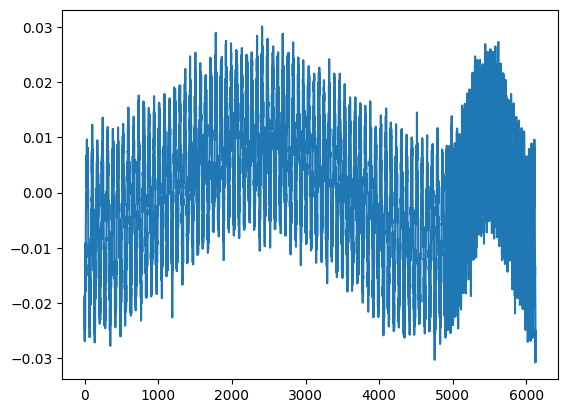

In [12]:
plt.plot(eig_V[:,0])

(-0.6603709386930916,
 1.0210743840877696,
 -0.23012341195246752,
 0.23012341195246752)

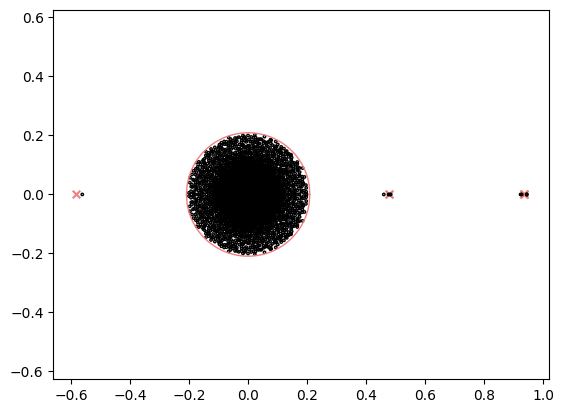

In [13]:
x_dots = np.linspace(-radius, radius, 200)
y_dots = np.sqrt(radius**2 - x_dots**2)

plt.plot(x_dots, y_dots, c='lightcoral', linewidth=1)
plt.plot(x_dots, -y_dots, c='lightcoral', linewidth=1)
plt.scatter(real_part_pred_select, imag_part_pred_select, s=30, c='lightcoral', marker='x')
real_part = np.real(eigs)
imag_part = np.imag(eigs)
plt.scatter(real_part, imag_part, s=3, c='none', marker='o', edgecolors='k')
plt.axis("equal")

In [15]:
eigs[0]

(0.944645051234094+0.0008894939452090937j)

In [136]:
def wrapped_Guassian(x, sigma):
    num = int(np.floor(5 * np.max(sigma))) + 1
    sum = 0
    for n in range(-num, num + 1):
        sum += np.exp(-(x+n)**2/(2 * sigma**2))/(np.sqrt(2*np.pi) * sigma)
    return sum

loc_E_x = (np.ones((int(np.ceil(np.sqrt(N_E))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_E)))).reshape((1,-1)))).reshape(-1)
loc_E_y = (np.ones((int(np.ceil(np.sqrt(N_E))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_E)))).reshape((1,-1)))).T.reshape(-1)
loc_I_x = (np.ones((int(np.ceil(np.sqrt(N_I))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_I)))).reshape((1,-1)))).reshape(-1)
loc_I_y = (np.ones((int(np.ceil(np.sqrt(N_I))),1)).dot(np.linspace(0, 1, int(np.ceil(np.sqrt(N_I)))).reshape((1,-1)))).T.reshape(-1)
loc_x = np.hstack((loc_E_x[0:N_E], loc_I_x[0:N_I])) 
loc_y = np.hstack((loc_E_y[0:N_E], loc_I_y[0:N_I])) 
dist_x = loc_x.reshape((N_E + N_I, 1)) - loc_x.reshape((1, N_E + N_I))
dist_y = loc_y.reshape((N_E + N_I, 1)) - loc_y.reshape((1, N_E + N_I))

d_list = np.block([[np.ones((N_E, N_E)) * d_EE, np.ones((N_E, N_I)) * d_EI],
                [np.ones((N_I, N_E)) * d_IE, np.ones((N_I, N_I)) * d_II]]) 
dist_coef = wrapped_Guassian(dist_x, d_list) * wrapped_Guassian(dist_y, d_list)
conn_prob = np.block([[np.ones(shape=(N_E, N_E))*conn_NEE/N_E, np.ones(shape=(N_E, N_I))*conn_NEI/N_E],
        [np.ones(shape=(N_I, N_E))*conn_NIE/N_I, np.ones(shape=(N_I, N_I))*conn_NII/N_I]])*dist_coef
conn_syna = np.random.binomial(1, conn_prob, size=(N_E+N_I, N_E+N_I))
J_mean = np.block([[np.ones(shape=(N_E, N_E))*J_EE, np.ones(shape=(N_E, N_I))*J_EI],
        [np.ones(shape=(N_I, N_E))*J_IE, np.ones(shape=(N_I, N_I))*J_II]])
J_var = np.block([[np.random.randn(N_E, N_E)*sigma_EE, np.random.randn(N_E, N_I)*sigma_EI],
        [np.random.randn(N_I, N_E)*sigma_IE, np.random.randn(N_I, N_I)*sigma_II]])
J = (J_mean + J_var) * conn_syna 

J_spa = spa.csr_matrix(J)
eigs, eig_V = spalin.eigs(J_spa,k=100)

KeyboardInterrupt: 